In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data

,video_id,category_id,description
0,9WFf9XY5rME,24.0,CLICK TO SUBSCRIBE TO THE YOUTUBERS IN THIS EP...
1,REbjfHF0N0s,10.0,Jia & Jackson in the #MOOD\n\nProduced by The ...
2,hDEc4ImIVHk,25.0,Speaking at the March for Our Lives event in W...
3,JyUKqUTp9rc,26.0,HEY EVERYONE! Today I'm testing out the brand ...
4,leu-cTvMWTA,10.0,EXO's Winter Special Album Universe has been r...
...,...,...,...
5200,C7mxTEskjQg,15.0,In the frozen landscape of the Canadian Arctic...
5201,ARuS950sgXM,25.0,"Nikolas Cruz, accused of killing 17 people in ..."
5202,LU6xDgpnIyM,23.0,Song - Nothing Without You by Dylan Gardner \n...
5203,Ye4z35i1b2Q,26.0,Subscribe Here: http://bit.ly/2uaz0on\n12 Funn...


In [26]:
categories=data['category_id'].unique()

In [27]:
temp={}
i=0
for c in (categories):
    temp[c]=i
    i+=1

In [28]:
temp

{24.0: 0,
 10.0: 1,
 25.0: 2,
 26.0: 3,
 23.0: 4,
 22.0: 5,
 1.0: 6,
 2.0: 7,
 28.0: 8,
 27.0: 9,
 17.0: 10,
 15.0: 11,
 20.0: 12,
 19.0: 13,
 29.0: 14,
 43.0: 15}

In [30]:
data['category_id']=data['category_id'].map(temp)

In [31]:
data

,video_id,category_id,description
0,9WFf9XY5rME,0,CLICK TO SUBSCRIBE TO THE YOUTUBERS IN THIS EP...
1,REbjfHF0N0s,1,Jia & Jackson in the #MOOD\n\nProduced by The ...
2,hDEc4ImIVHk,2,Speaking at the March for Our Lives event in W...
3,JyUKqUTp9rc,3,HEY EVERYONE! Today I'm testing out the brand ...
4,leu-cTvMWTA,1,EXO's Winter Special Album Universe has been r...
...,...,...,...
5200,C7mxTEskjQg,11,In the frozen landscape of the Canadian Arctic...
5201,ARuS950sgXM,2,"Nikolas Cruz, accused of killing 17 people in ..."
5202,LU6xDgpnIyM,4,Song - Nothing Without You by Dylan Gardner \n...
5203,Ye4z35i1b2Q,3,Subscribe Here: http://bit.ly/2uaz0on\n12 Funn...


In [33]:
data.category_id.value_counts()

0     1272
1      781
3      521
4      438
2      375
5      373
10     305
8      299
6      269
9      229
11     132
7       73
12      73
13      57
14       5
15       3
Name: category_id, dtype: int64

In [36]:
data.video_id.duplicated().value_counts()

False    3211
True     1994
Name: video_id, dtype: int64

1994 video ids are duplicated

In [37]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le=LabelEncoder()

In [42]:
trans_id=le.fit_transform(data['video_id'])

In [43]:
data['transformed_id']=trans_id

In [45]:
data.transformed_id.value_counts()

59      7
683     7
2224    6
3035    6
1894    6
       ..
1761    1
119     1
2205    1
1983    1
1764    1
Name: transformed_id, Length: 3211, dtype: int64

In [46]:
data=data.drop('video_id',axis=1)

In [47]:
data

,category_id,description,transformed_id
0,0,CLICK TO SUBSCRIBE TO THE YOUTUBERS IN THIS EP...,515
1,1,Jia & Jackson in the #MOOD\n\nProduced by The ...,1420
2,2,Speaking at the March for Our Lives event in W...,2292
3,3,HEY EVERYONE! Today I'm testing out the brand ...,1046
4,1,EXO's Winter Special Album Universe has been r...,2522
...,...,...,...
5200,11,In the frozen landscape of the Canadian Arctic...,648
5201,2,"Nikolas Cruz, accused of killing 17 people in ...",565
5202,4,Song - Nothing Without You by Dylan Gardner \n...,1123
5203,3,Subscribe Here: http://bit.ly/2uaz0on\n12 Funn...,1764


In [49]:
import matplotlib.pyplot as plt

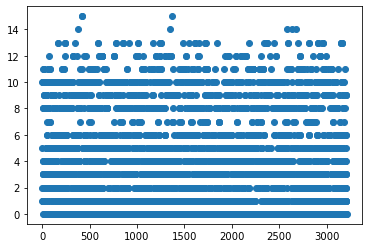

In [53]:
plt.scatter(data.transformed_id,data.category_id)

This means it is not necessary that a channel with particular video id can only post similar type of videos. Similar vidoes also has diffrent categories

# Preprocessing

In [58]:
new_text=[]
for sent in data['description']:
    temp_str=re.sub(r"http\S+"," ",sent)
    temp_str=re.sub(r"www\S+"," ",temp_str)
    new_text.append(temp_str)

In [60]:
len(new_text)

5205

In [91]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop=set(stopwords.words('english'))
sno_stem=SnowballStemmer('english')
# print(stop)
# print(sno_stem.stem('happy'))

def cleanhtml(sentence):
    patt=re.compile('<.*?>')
    clean=re.sub(patt,' ',sentence)
    return clean
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
def cleanpunc(sentence):
    clean=re.sub(r'[^A-Za-z0-9]+',' ',sentence)
    return clean
def cleanalphanum(sentence):
    clean=re.sub("\S*\d\S*", "", sentence).strip()
    return clean


def preprocess(sentences):
    i=0
    prepro_reviews=[]
    for sent in sentences.values:
        sent=cleanhtml(sent)
        sent=cleanpunc(sent)
        sent=cleanalphanum(sent)
        sent=decontracted(sent)
        words=[]
        for word in sent.split(" "):
            if word not in stop:
                s=sno_stem.stem(word.lower()).encode('utf8')
                words.append(s)
        sent=b" ".join(words)
        prepro_reviews.append(sent)
        i+=1
    #print(prepro_reviews)
    return prepro_reviews

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
def preprocess2(sentences):
    prepro_reviews=preprocess(sentences)
    list_of_sentence=[]
    for sentence in prepro_reviews:
        list_of_sentence.append(sentence.decode().split())
    # for sent in list_of_sentence:
    #     for word in sent:
    #print(list_of_sentence)
    return list_of_sentence

In [64]:
sentences=pd.Series(new_text)
prepro_text=preprocess2(sentences)

In [94]:
prepro_text[0]

['click',
 'to',
 'subscrib',
 'to',
 'the',
 'youtub',
 'in',
 'this',
 'episod',
 'a',
 'video',
 'to',
 'tri',
 'to',
 'get',
 'the',
 'reactor',
 'to',
 'laugh',
 'laughchalleng',
 'fbeteam',
 'com',
 'npleas',
 'watch',
 'subscrib',
 'creator',
 'featur',
 'episod',
 'then',
 'hit',
 'the',
 'new',
 'video',
 'pt',
 'react',
 'seri',
 'watch',
 'latest',
 'video',
 'fbe',
 'n',
 'nyoutub',
 'tri',
 'smile',
 'laugh',
 'see',
 'reaction',
 'laugh',
 'challeng',
 'n',
 'ncontent',
 'featur',
 'episod',
 'nserious',
 'n',
 'feel',
 'cone',
 'head',
 'n',
 'sourc',
 'nfrom',
 'kirin',
 'j',
 'callinan',
 'big',
 'enough',
 'n',
 'lyric',
 'n',
 'galaxi',
 'n',
 'batteri',
 'n',
 'seem',
 'cabbag',
 'patch',
 'babi',
 'vine',
 'n',
 'goal',
 'credit',
 'origin',
 'link',
 'content',
 'featur',
 'show',
 'if',
 'see',
 'incorrect',
 'miss',
 'attribut',
 'pleas',
 'reach',
 'credit',
 'fbeteam',
 'com',
 'n',
 'nthis',
 'episod',
 'featur',
 'follow',
 'youtub',
 'nkeith',
 'habersberg'

In [72]:
data['preprocessed_desc']=prepro_text

In [73]:
data

,category_id,description,transformed_id,preprocessed_desc
0,0,CLICK TO SUBSCRIBE TO THE YOUTUBERS IN THIS EP...,515,"[click, to, subscrib, to, the, youtub, in, thi..."
1,1,Jia & Jackson in the #MOOD\n\nProduced by The ...,1420,"[jia, jackson, mood, n, nproduc, the, partysqu..."
2,2,Speaking at the March for Our Lives event in W...,2292,"[speak, march, our, live, event, washington, m..."
3,3,HEY EVERYONE! Today I'm testing out the brand ...,1046,"[hey, everyon, today, i, test, brand, new, col..."
4,1,EXO's Winter Special Album Universe has been r...,2522,"[exo, winter, special, album, univers, releas,..."
...,...,...,...,...
5200,11,In the frozen landscape of the Canadian Arctic...,648,"[in, frozen, landscap, canadian, arctic, one, ..."
5201,2,"Nikolas Cruz, accused of killing 17 people in ...",565,"[nikola, cruz, accus, kill, peopl, parkland, f..."
5202,4,Song - Nothing Without You by Dylan Gardner \n...,1123,"[song, noth, without, you, dylan, gardner, nit..."
5203,3,Subscribe Here: http://bit.ly/2uaz0on\n12 Funn...,1764,"[subscrib, here, funni, coupl, prank, prank, w..."


# Converting the sentences to tfidf - word2vec

In [74]:
from gensim.models import Word2Vec

In [75]:
w2v_model=Word2Vec(prepro_text,min_count=6,size=50, workers=4)

In [80]:
w2v_model.wv.similarity('girl','boy')

0.84908247

In [83]:
w2v_model.wv['boy']

array([-0.50519425, -0.07825918, -0.18435396, -0.4755037 , -0.24152566,
        0.23351912,  0.25570056, -0.36471078, -0.17988594,  0.05163268,
       -0.570078  , -0.4208055 ,  0.4868832 , -0.7781154 , -0.11176485,
       -0.35456052, -0.0202883 ,  0.64694196, -0.0029078 ,  0.12015936,
       -0.33451426,  0.02228179, -0.48766124, -0.15339842, -0.31125966,
        0.08822977,  0.5359767 , -0.31394756,  0.30054003, -0.55021614,
        0.52987427, -0.3793774 ,  0.21263412,  0.2735904 ,  0.5772743 ,
        0.32904568, -0.1881475 ,  0.14500637,  0.38683394,  0.08990692,
        0.41810828,  0.2096734 ,  0.3527697 ,  0.03880199,  0.16152881,
        0.62092304, -0.31396306, -0.03803546, -0.3563921 ,  0.9088048 ],
      dtype=float32)

In [100]:
w2v_words = list(w2v_model.wv.vocab)

# Now each word is mapped to a vector of size 50

In [95]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm  # Used to create progress bars
model = TfidfVectorizer()
model.fit(preprocess(sentences))
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))
tfidf_feat = model.get_feature_names()

In [96]:
tfidf_feat

['aabi',
 'aafghani',
 'aaliyah',
 'aaliyahxo',
 'aam',
 'aaron',
 'ab',
 'abalo',
 'abandon',
 'abba',
 'abbey',
 'abbi',
 'abbrevi',
 'abc',
 'abcv',
 'abdallah',
 'abdelwahab',
 'abdom',
 'abdulla',
 'abdullah',
 'abdulmateen',
 'abe',
 'abel',
 'abelardo',
 'abenir',
 'abhijit',
 'abid',
 'abigail',
 'abil',
 'abl',
 'ablaz',
 'aboah',
 'aboard',
 'abonnez',
 'abort',
 'about',
 'abov',
 'abovitz',
 'abqd',
 'abraham',
 'abram',
 'abroad',
 'abrupt',
 'abseil',
 'absent',
 'absolu',
 'absolut',
 'absorb',
 'abstract',
 'absurd',
 'abu',
 'abud',
 'abund',
 'abus',
 'abyss',
 'ac',
 'aca',
 'acaba',
 'acabado',
 'academ',
 'academi',
 'academia',
 'acanthus',
 'acc',
 'acceler',
 'accent',
 'accept',
 'access',
 'accessori',
 'accid',
 'accident',
 'acclaim',
 'accommod',
 'accompani',
 'accomplish',
 'accord',
 'account',
 'accumul',
 'accur',
 'accus',
 'ace',
 'acefamili',
 'acercado',
 'aceton',
 'ach',
 'achiev',
 'achok',
 'acid',
 'acima',
 'acknowledg',
 'acn',
 'aconteceu',

In [97]:
dictionary

{'aabi': 8.864419904994566,
 'aafghani': 7.611656936499197,
 'aaliyah': 7.94812917312041,
 'aaliyahxo': 8.4589547968864,
 'aam': 8.171272724434619,
 'aaron': 6.33869126068631,
 'ab': 7.611656936499197,
 'abalo': 8.171272724434619,
 'abandon': 6.667195327658346,
 'abba': 8.4589547968864,
 'abbey': 8.171272724434619,
 'abbi': 7.94812917312041,
 'abbrevi': 8.864419904994566,
 'abc': 5.665746787443884,
 'abcv': 7.94812917312041,
 'abdallah': 8.864419904994566,
 'abdelwahab': 7.94812917312041,
 'abdom': 8.864419904994566,
 'abdulla': 6.9926177280929736,
 'abdullah': 7.94812917312041,
 'abdulmateen': 8.4589547968864,
 'abe': 8.864419904994566,
 'abel': 6.9926177280929736,
 'abelardo': 8.864419904994566,
 'abenir': 8.864419904994566,
 'abhijit': 8.4589547968864,
 'abid': 8.4589547968864,
 'abigail': 8.864419904994566,
 'abil': 6.299470547533029,
 'abl': 5.446693221381199,
 'ablaz': 8.171272724434619,
 'aboah': 8.864419904994566,
 'aboard': 7.611656936499197,
 'abonnez': 8.4589547968864,
 'abo

In [98]:
def convert_to_vect(list_of_sentence):
    tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
    row=0;
    for sent in tqdm(list_of_sentence): # for each review/sentence 
        sent_vec = np.zeros(50) # as word vectors are of zero length
        weight_sum =0; # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            if word in w2v_words and word in tfidf_feat:
                vec = w2v_model.wv[word]
    #             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
                # to reduce the computation we are 
                # dictionary[word] = idf value of word in whole courpus
                # sent.count(word)/len(sent) = tf valeus of word in this review
                tf_idf = dictionary[word]*(sent.count(word)/len(sent))
                sent_vec += (vec * tf_idf)
                weight_sum += tf_idf
        if weight_sum != 0:
            sent_vec /= weight_sum
        tfidf_sent_vectors.append(sent_vec)
        row += 1
    return  tfidf_sent_vectors

In [101]:
converted_desc=convert_to_vect(prepro_text)

100%|██████████████████████████████████████████████████████████████████████████████| 5205/5205 [03:56<00:00, 22.00it/s]


In [103]:
converted_desc[0]

array([-0.38320018, -0.19652928, -0.3863303 , -0.59279655, -0.0616388 ,
        0.38692443,  0.30647993, -0.48602998, -0.43550448, -0.2442853 ,
       -0.52383458, -0.54494141,  0.5453809 , -0.49372954,  0.05085436,
       -0.21808214, -0.35588539,  0.30327882, -0.05943682,  0.17647891,
       -0.38719636,  0.2242403 , -0.14749961, -0.06454912, -0.7079166 ,
       -0.18082333,  0.60364602, -0.4941105 ,  0.26702948, -0.64368711,
        0.50771972, -0.48450564,  0.25648136,  0.00127976,  0.73417286,
        0.51418356,  0.15043556,  0.18081702,  0.3166587 , -0.16261187,
        0.81390821,  0.36850896,  0.27880842,  0.04817512,  0.75004592,
        1.010025  , -0.5724919 ,  0.17197365, -0.31621069,  0.84393763])

In [110]:
new_data=pd.DataFrame(data=converted_desc,columns=list(np.arange(50)))

In [111]:
new_data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.383200,-0.196529,-0.386330,-0.592797,-0.061639,0.386924,0.306480,-0.486030,-0.435504,-0.244285,...,0.813908,0.368509,0.278808,0.048175,0.750046,1.010025,-0.572492,0.171974,-0.316211,0.843938
1,-0.758918,0.106050,-0.138680,-0.782859,-0.169357,-0.014748,-0.106402,-0.220189,-0.470053,0.102827,...,0.697709,-0.048158,0.098161,0.076451,0.165794,0.331237,-0.317391,0.311603,-0.168856,0.870280
2,-0.420712,0.001701,-0.004397,-0.280512,0.184933,0.068497,0.202630,-0.281741,-0.290773,0.017111,...,0.063357,0.050769,0.018184,0.053537,0.216747,0.453705,-0.523097,-0.193434,-0.392679,0.665376
3,-0.119354,-0.212743,-0.162561,-0.190108,-0.077359,0.437628,0.530475,-0.341664,-0.162481,-0.246350,...,0.507028,0.552979,0.262707,0.011461,0.564631,1.004921,-0.465219,0.192733,-0.436280,0.743820
4,-0.427602,-0.388004,-0.639915,-0.502399,-0.227805,0.226666,0.581628,0.095275,-0.389274,-0.060360,...,0.698895,0.523891,-0.582032,0.068006,0.806417,0.998860,-0.372086,0.060332,-0.455650,0.363492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,-0.453293,0.054549,-0.364910,-0.408095,0.233459,0.013928,0.205805,0.049746,-0.602240,-0.362431,...,0.344625,0.013569,-0.207983,0.109638,0.639586,0.664816,-0.793398,0.208866,-0.198751,0.672631
5201,-0.301372,-0.028212,-0.204557,-0.372926,0.345677,0.135879,0.127904,-0.430649,-0.301747,-0.321363,...,0.279433,0.155025,0.284018,0.169718,0.585952,0.696843,-0.604049,0.139850,-0.398198,0.741773
5202,-0.019535,-0.395818,-0.192331,-0.065293,-0.001080,0.498789,0.710616,-0.378450,-0.283066,-0.386407,...,0.600285,0.691266,0.323906,0.186792,0.822797,1.162722,-0.766456,0.085529,-0.301507,0.662527
5203,-0.309146,-0.111109,-0.101919,-0.157381,0.066458,0.235444,0.273420,-0.473901,-0.268255,-0.232183,...,0.451067,0.270815,0.351265,0.191840,0.476640,0.688284,-0.647587,0.075750,-0.520514,0.827787


In [112]:
import sqlite3
conn=sqlite3.connect('tfidf_w2v.sqlite')
c=conn.cursor()
conn.text_factory=str
new_data.to_sql('Description',conn,if_exists='replace')

5205

In [114]:
new_data['category_id']=data['category_id']

In [116]:
new_data['video_id']=data['transformed_id']

In [117]:
new_data

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,category_id,video_id
0,-0.383200,-0.196529,-0.386330,-0.592797,-0.061639,0.386924,0.306480,-0.486030,-0.435504,-0.244285,...,0.278808,0.048175,0.750046,1.010025,-0.572492,0.171974,-0.316211,0.843938,0,515
1,-0.758918,0.106050,-0.138680,-0.782859,-0.169357,-0.014748,-0.106402,-0.220189,-0.470053,0.102827,...,0.098161,0.076451,0.165794,0.331237,-0.317391,0.311603,-0.168856,0.870280,1,1420
2,-0.420712,0.001701,-0.004397,-0.280512,0.184933,0.068497,0.202630,-0.281741,-0.290773,0.017111,...,0.018184,0.053537,0.216747,0.453705,-0.523097,-0.193434,-0.392679,0.665376,2,2292
3,-0.119354,-0.212743,-0.162561,-0.190108,-0.077359,0.437628,0.530475,-0.341664,-0.162481,-0.246350,...,0.262707,0.011461,0.564631,1.004921,-0.465219,0.192733,-0.436280,0.743820,3,1046
4,-0.427602,-0.388004,-0.639915,-0.502399,-0.227805,0.226666,0.581628,0.095275,-0.389274,-0.060360,...,-0.582032,0.068006,0.806417,0.998860,-0.372086,0.060332,-0.455650,0.363492,1,2522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,-0.453293,0.054549,-0.364910,-0.408095,0.233459,0.013928,0.205805,0.049746,-0.602240,-0.362431,...,-0.207983,0.109638,0.639586,0.664816,-0.793398,0.208866,-0.198751,0.672631,11,648
5201,-0.301372,-0.028212,-0.204557,-0.372926,0.345677,0.135879,0.127904,-0.430649,-0.301747,-0.321363,...,0.284018,0.169718,0.585952,0.696843,-0.604049,0.139850,-0.398198,0.741773,2,565
5202,-0.019535,-0.395818,-0.192331,-0.065293,-0.001080,0.498789,0.710616,-0.378450,-0.283066,-0.386407,...,0.323906,0.186792,0.822797,1.162722,-0.766456,0.085529,-0.301507,0.662527,4,1123
5203,-0.309146,-0.111109,-0.101919,-0.157381,0.066458,0.235444,0.273420,-0.473901,-0.268255,-0.232183,...,0.351265,0.191840,0.476640,0.688284,-0.647587,0.075750,-0.520514,0.827787,3,1764


In [118]:
X=new_data.drop('category_id',axis=1)
Y=new_data['category_id']

In [119]:
X.shape,Y.shape

((5205, 51), (5205,))

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)

In [122]:
X_train.shape,X_test.shape

((3487, 51), (1718, 51))

# Using KNN

In [199]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [202]:
def scoring(model,X_test,Y_test):
    

In [158]:
myList = list(range(0,100))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_se

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_se

In [159]:
cv_scores

[0.45712539384907275,
 0.31001046317686914,
 0.2583871908220032,
 0.25035925547170873,
 0.2434767937984588,
 0.23229510598591394,
 0.23086030400930588,
 0.23171990258047295,
 0.23057294896327726,
 0.22368950066325985,
 0.22684423975227774,
 0.22139485345879276,
 0.21766861081471198,
 0.22627051628698802,
 0.22914012024020414,
 0.2228291621220171,
 0.2234041188707662,
 0.22512306935640858,
 0.22196931689415814,
 0.22512479595325166,
 0.22541141102920462,
 0.2274196898144106,
 0.23057270230658541,
 0.23229263941899522,
 0.23085882406915462,
 0.23458753328015416,
 0.23745491732314347,
 0.23917608771901266,
 0.24089602483142247,
 0.2391748544355533,
 0.24060891644208574,
 0.23774128574240458,
 0.24204273179192634,
 0.24232934686787932,
 0.24089553151803875,
 0.24232910021118745,
 0.24175685668604893,
 0.2420439650753857,
 0.2408967648014981,
 0.23774227236917203,
 0.2408975047715737,
 0.23831599583446175,
 0.23860236425372292,
 0.23888848601629217,
 0.2397478379307674,
 0.24032057476928967

In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [208]:
knn=KNeighborsClassifier(n_neighbors=1)

In [209]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [210]:
knn.score(X_test,Y_test)

0.5675203725261933

In [211]:
pred=knn.predict(X_test)
100*metrics.f1_score(Y_test,pred,average='weighted')

56.89464559875934

# Using Logistic Regresssion

In [152]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [149]:
lr=LogisticRegression(multi_class='multinomial',solver='lbfgs')

In [150]:
lr.fit(X_train,Y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [151]:
lr.score(X_test,Y_test)

0.28346915017462165

In [212]:
pred=lr.predict(X_test)
100*metrics.f1_score(Y_test,pred,average='weighted')

17.34535522645495

In [177]:
from sklearn.model_selection import GridSearchCV
tuned_param=[{'C':[10**-4,10**-2, 10**0, 10**2, 10**4]}]
lr_gs=GridSearchCV(LogisticRegression(multi_class='multinomial',solver='lbfgs'),tuned_param,scoring='f1_micro',cv=5)

In [178]:
lr_gs.fit(X_train,Y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
             scoring='f1_micro')

In [179]:
lr_gs.score(X_test,Y_test)

0.2729918509895227

In [213]:
pred=lr_gs.predict(X_test)
100*metrics.f1_score(Y_test,pred,average='weighted')

15.54714791034957

# Using decision tree

In [160]:
from sklearn.tree import DecisionTreeClassifier

In [161]:
dtc=DecisionTreeClassifier()

In [162]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [163]:
dtc.score(X_test,Y_test)

0.7142025611175786

In [214]:
pred=dtc.predict(X_test)
100*metrics.f1_score(Y_test,pred,average='weighted')

71.25758259859906

# Using Decision tree with grid search cv

In [215]:
hyper=[{'max_depth':[2,3,5,7]}]
dtc_gs=GridSearchCV(dtc,hyper,scoring='f1_weighted',cv=5,)

In [216]:
dtc_gs.fit(X_train,Y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [2, 3, 5, 7]}], scoring='f1_weighted')

In [218]:
dtc_gs.score(X_test,Y_test)

0.3700056606797851

In [219]:
pred=dtc_gs.predict(X_test)
100*metrics.f1_score(Y_test,pred,average='weighted')

37.00056606797851

# Using Naive Bayes

In [176]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb.score(X_test,Y_test)

0.23806752037252618

In [220]:
pred=gnb.predict(X_test)
100*metrics.f1_score(Y_test,pred,average='weighted')

26.347894363882947

# So after all decision tree did the best job so far

# Predicting test data

In [180]:
test_data=pd.read_csv('test.csv')

In [181]:
test_data

,video_id,description
0,tfNzMKvoVOU,States are taking a multi-million dollar gambl...
1,PjqKPHZJgF0,"Family Feud by Lil Wayne feat. Drake, off the ..."
2,KobCmaF10vQ,Black Nerd Review of Black Lightning Episode 1...
3,3D_ZODCSKXo,On this episode of Collider Movie Talk (Wednes...
4,6kyXZGyso8M,"Alabama head coach Nick Saban, freshman quarte..."
...,...,...
2227,ObvUP5YxAKg,7th-grader shoots himself at Jackson Memorial ...
2228,YvEGAcgpwqQ,"To Kevin Hart, they’re not partner push-ups—th..."
2229,tYF1dQRVS2c,Grab the RECIPE here: http://thescranline.com\...
2230,B2YCf8dTkIM,"Use my link http://www.audible.com/forge , or ..."


In [184]:
trans_id_test=le.fit_transform(test_data['video_id'])

In [185]:
test_data['transformed_id']=trans_id_test

In [188]:
test_data['transformed_id'].value_counts()

552     4
1762    4
484     4
167     4
980     4
       ..
909     1
1112    1
1580    1
830     1
1637    1
Name: transformed_id, Length: 1790, dtype: int64

In [189]:
new_text2=[]
for sent in test_data['description']:
    temp_str=re.sub(r"http\S+"," ",sent)
    temp_str=re.sub(r"www\S+"," ",temp_str)
    new_text2.append(temp_str)

In [194]:
sentences2=pd.Series(new_text2)
prepro_text2=preprocess2(sentences2)

In [195]:
converted_desc2=convert_to_vect(prepro_text2)

100%|██████████████████████████████████████████████████████████████████████████████| 2232/2232 [01:26<00:00, 25.94it/s]


In [225]:
new_data_test=pd.DataFrame(data=converted_desc2,columns=list(np.arange(50)))
new_data_test['video_id']=test_data['transformed_id']

In [226]:
new_data_test

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,video_id
0,-0.360126,-0.020581,-0.065819,-0.324184,0.044485,0.140296,0.293537,-0.202045,-0.274519,-0.083301,...,0.134494,0.239950,-0.056747,0.306519,0.526447,-0.430059,-0.081085,-0.289557,0.656364,1640
1,-0.254568,-0.201017,-0.449679,-0.407488,0.134840,0.230253,0.292275,-0.052290,-0.426687,-0.191558,...,0.249861,-0.243080,0.061736,0.691784,0.848560,-0.559013,0.226709,-0.224714,0.315794,773
2,-0.286823,-0.117750,-0.124536,-0.359360,-0.253424,0.114651,0.390886,-0.114399,-0.312973,0.034620,...,0.346305,0.083133,0.016347,0.293489,0.559862,-0.242215,0.176826,-0.045925,0.535092,629
3,-0.305827,-0.247973,-0.044502,-0.238600,0.014407,0.136082,0.691167,-0.219595,-0.296616,-0.143171,...,0.577361,-0.021062,0.090075,0.632946,0.914324,-0.527483,0.008584,-0.184279,0.666548,121
4,-0.258029,-0.038809,-0.112032,-0.274187,0.067094,0.108285,0.163924,-0.190048,-0.213058,-0.105882,...,0.113033,0.062439,-0.023375,0.304587,0.439828,-0.281287,0.066199,-0.175656,0.434371,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,-0.495440,0.114556,0.019360,-0.367294,0.075686,-0.066740,0.074533,-0.225697,-0.192257,-0.003885,...,-0.045500,0.282324,-0.057632,0.096677,0.280822,-0.237709,-0.106441,-0.280972,0.725048,742
2228,-0.947183,0.149204,-0.102465,-0.885135,-0.335956,-0.039767,-0.101516,-0.244664,-0.508324,0.158337,...,-0.052145,0.205568,-0.044681,0.162727,0.323914,-0.235310,0.227608,0.082454,0.948355,1002
2229,-0.586028,0.237538,0.034988,-0.682533,-0.097411,0.075772,-0.301778,-0.336993,-0.309727,-0.062882,...,-0.269743,0.773289,-0.051929,0.121074,0.238277,-0.235941,0.282325,-0.090616,0.978157,1637
2230,-0.277778,-0.059405,-0.106143,-0.205406,0.034399,0.300906,0.232750,-0.448074,-0.236410,-0.255453,...,0.214547,0.497137,0.063896,0.516201,0.791531,-0.565644,0.043299,-0.477719,0.784852,343


In [231]:
pred=dtc.predict(new_data_test)

In [232]:
new_data_test['prediction']=pred

In [234]:
submission_data=new_data_test.drop(list(np.arange(50)),axis=1)

In [236]:
submission_data['actual_video_id']=test_data['video_id']

In [238]:
submission_data=submission_data.drop('video_id',axis=1)

In [239]:
submission_data['video_id']=submission_data['actual_video_id']

In [240]:
submission_data=submission_data.drop('actual_video_id',axis=1)

In [241]:
submission_data

,prediction,video_id
0,5,tfNzMKvoVOU
1,1,PjqKPHZJgF0
2,0,KobCmaF10vQ
3,0,3D_ZODCSKXo
4,2,6kyXZGyso8M
...,...,...
2227,2,ObvUP5YxAKg
2228,4,YvEGAcgpwqQ
2229,3,tYF1dQRVS2c
2230,3,B2YCf8dTkIM


In [245]:
def get_key(val):
    for key, value in temp.items():
         if val == value:
            return key

In [246]:
category=submission_data['prediction'].map(get_key)

In [249]:
submission_data['category_id']=category

In [250]:
submission_data=submission_data.drop('prediction',axis=1)

In [251]:
submission_data

,video_id,category_id
0,tfNzMKvoVOU,22.0
1,PjqKPHZJgF0,10.0
2,KobCmaF10vQ,24.0
3,3D_ZODCSKXo,24.0
4,6kyXZGyso8M,25.0
...,...,...
2227,ObvUP5YxAKg,25.0
2228,YvEGAcgpwqQ,23.0
2229,tYF1dQRVS2c,26.0
2230,B2YCf8dTkIM,26.0


In [254]:
file_name = 'SubmissionData.csv'
  
# saving the excel
submission_data.to_csv(file_name)